In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

## Стандартный алгоритм

В стандартном алгоритм мы просто считаем отношение $dy/dx$ и таким образом получаем значение производной в дискретных точках

In [2]:
def f(x):
    return np.exp(x)

In [3]:
def derivative(x, dx):
    return (f(x + dx) - f(x)) / dx

In [22]:
end_x = 2
dx = 0.01
x_pnt = np.linspace(0, end_x, int(end_x / dx))
#dx = x_pnt[1] - x_pnt[0]
res_func = []
for x in x_pnt:
    res_func.append(derivative(x, dx))
    

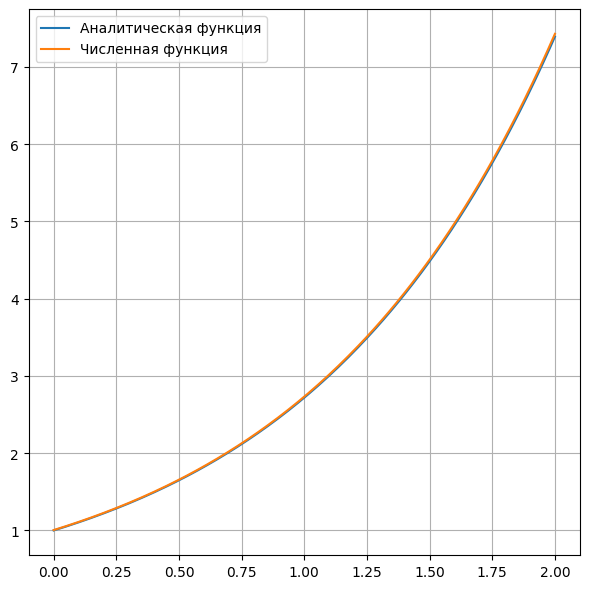

In [23]:
fig, ax = plt.subplots(figsize=(6,6), layout='tight')
ax.plot(x_pnt, f(x_pnt), label='Аналитическая функция')
ax.plot(x_pnt, res_func, label='Численная функция')
ax.grid()
ax.legend()

## Двухточечная схема

Самая точная схема вычисления - средняя. Формула:

$f'(x)=\frac{f(x+dx)-f(x-dx)}{2*dx}$

Также теперь представим, что функция задана не аналитически, а дискретно

In [36]:
dx = 0.01
end_x = 2
x_pnt = np.linspace(0, end_x, int(end_x / dx))
func_pnt = f(x_pnt)

In [37]:
def derivative(f1, f2, dx):
    return (f2 - f1) / (2 * dx)

In [38]:
res_func = []
x_res_func = []
for i in range(1, func_pnt.shape[0] - 1):
    res_func.append(derivative(func_pnt[i - 1], func_pnt[i + 1], dx))

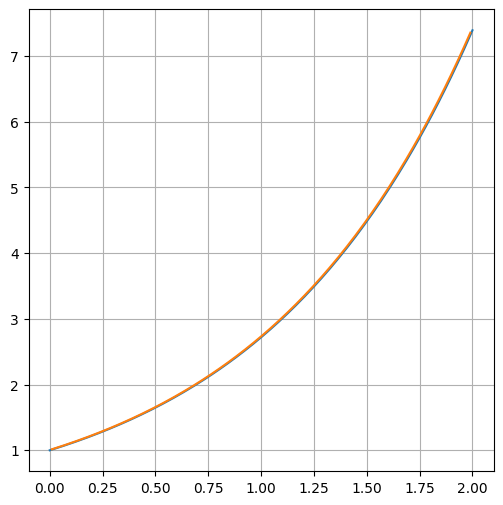

In [39]:
fig, ax = plt.subplots(figsize=(6,6))
ax.grid()
ax.plot(x_pnt, func_pnt, label='Аналитическая функция')
ax.plot(x_pnt[1:-1], res_func, label='Численная функция')